In [128]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [129]:
df = pd.DataFrame()
df = pd.read_csv('/Users/rorymurray/Downloads/beer_ratings.txt', delimiter = "\t")
df.columns = ["alcohol_by_weight","rating","bitterness","nitrogen","turbidity","sugars","degree_of_fermentation","calorific_value","density","pH","colour","sulphites"]



In [130]:
df=df.sample(frac=1).reset_index(drop=True)
df.head()

,alcohol_by_weight,rating,bitterness,nitrogen,turbidity,sugars,degree_of_fermentation,calorific_value,density,pH,colour,sulphites
0,5.904762,80,8.3,0.350,1.2284,15.75,49.266,14,0.96439,4.02,17.200,12.8125
1,5.952381,72,10.0,0.530,1.4940,11.97,40.664,9,0.96480,3.85,15.050,5.0000
2,4.619048,61,8.0,0.680,0.0332,11.97,62.560,43,0.96683,3.90,15.695,16.8750
3,4.857143,62,7.0,0.745,0.3984,12.60,58.650,35,0.96547,4.07,15.265,13.7500
4,4.476190,58,9.7,0.430,1.3280,16.38,64.906,19,0.96782,3.80,10.320,21.2500


In [131]:
traindf = pd.DataFrame()

testdf = pd.DataFrame()

num = len(df)/3
num = int(num)
    

traindf = df.iloc[num:,[0,2,3,4,5,6,8,9,10,11]]
traindf_Y = df.iloc[num:,1]

testdf = df.iloc[:num,[0,2,3,4,5,6,8,9,10,11,]]
testdf_Y = df.iloc[:num,1]

In [132]:
lm = linear_model.LinearRegression()
model = lm.fit(traindf,traindf_Y)

In [133]:
predictions = model.predict(testdf)


In [134]:
#results

print("Testdf score : ",lm.score(testdf,testdf_Y))
print("Traindf score : ",lm.score(traindf,traindf_Y))
print(mean_squared_error(testdf_Y,predictions))

Testdf score :  0.3743141259463558
Traindf score :  0.4385461300610781
60.155167536375906


In [8]:
lm.coef_

array([ 6.32496090e+00,  7.40359168e-01, -1.47177661e+01, -9.02108092e-01,
        8.87784200e-03, -3.40962513e-02, -5.45318808e+02, -2.87970300e+00,
        6.81281657e-01, -6.48901767e-02])

In [9]:
lm.intercept_

570.8146757920157

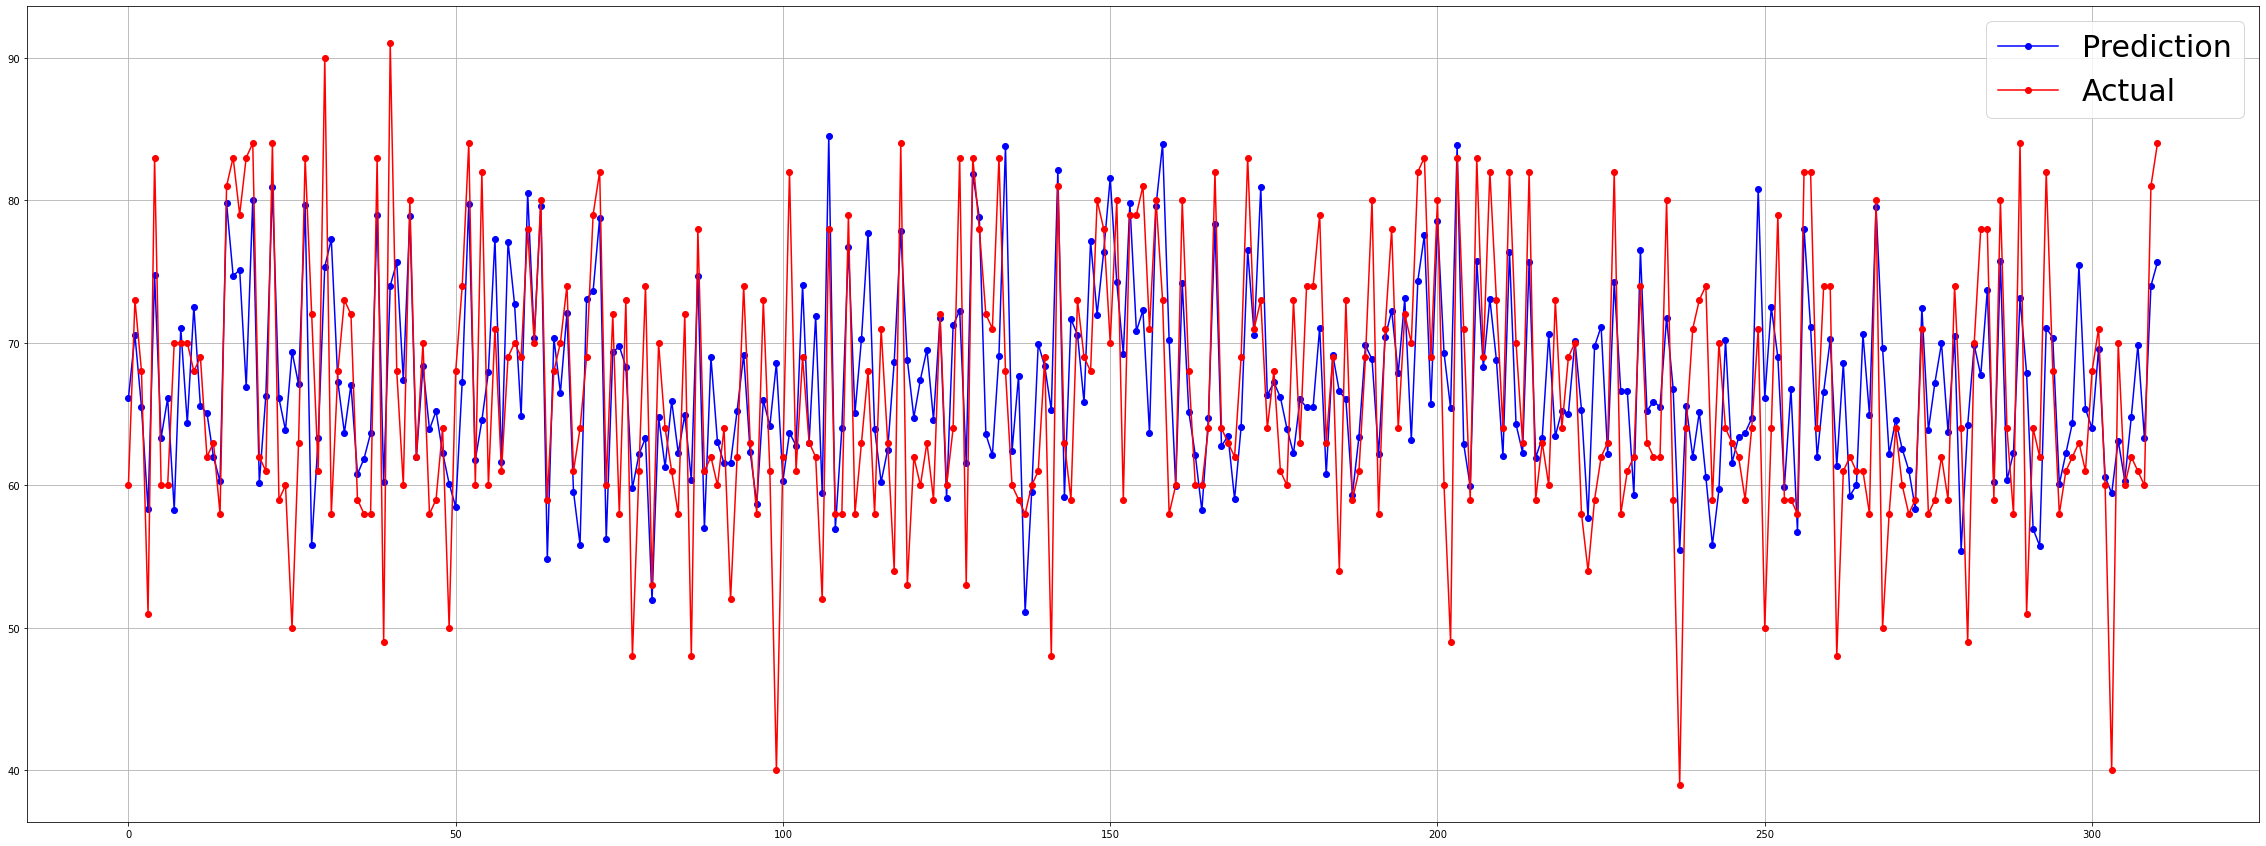

In [66]:

#plt.scatter(predictions,testdf_Y,color='red')
plt.figure(figsize=(40,15))
plt.plot(predictions, color='blue',label = 'Prediction',marker = 'o')
plt.plot(testdf_Y,color='red',marker = 'o',label = 'Actual')
plt.legend(loc =1, prop={'size': 30})
plt.grid(True)
plt.show()

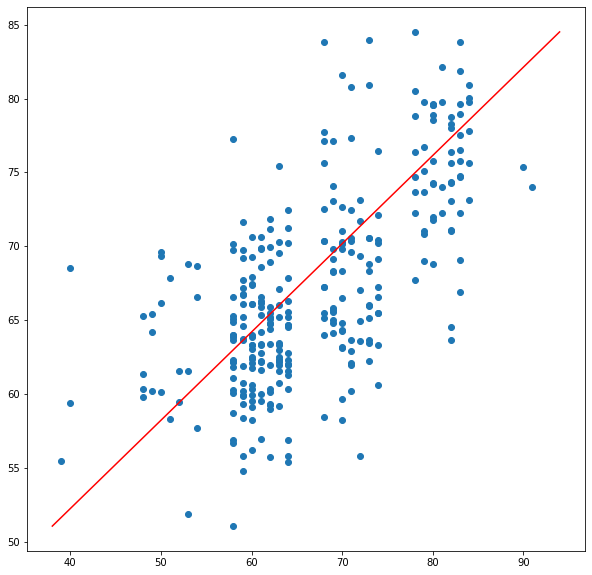

In [67]:
plt.figure(figsize=(10,10))
plt.scatter(testdf_Y,predictions)
plt.plot([min(traindf_Y), max(traindf_Y)],[min(predictions), max(predictions)], color = 'red')
plt.show()
